In [13]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import plotly.graph_objects as go
import plotly.express as px

In [29]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [19]:
fr_filt

,Unique Identifier,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
0,unknown_679.05463_0.536,0.536,679.05463,+,2.408421e+07,unknown,unknown,49,9.974970e+06,1.692144e+07,...,1.156896e+07,9.046158e+06,5.364408e+06,1.615157e+07,1.210451e+07,1.079174e+07,1.185658e+07,9.721337e+06,9.394720e+06,1.111960e+07
1,unknown_641.1087_0.537,0.537,641.10870,+,5.522238e+07,unknown,unknown,36,4.024286e+07,5.397037e+07,...,3.207186e+07,2.406236e+07,2.035223e+07,3.496832e+07,3.013993e+07,4.966627e+06,3.181116e+07,2.802334e+07,2.191732e+07,2.338934e+07
2,unknown_951.15973_0.541,0.541,951.15973,-,3.238113e+07,unknown,unknown,10,1.411587e+07,3.166872e+07,...,1.690386e+07,1.185835e+07,1.125893e+07,1.431970e+07,1.401550e+07,9.622362e+06,1.533037e+07,1.460625e+07,1.344883e+07,1.259183e+07
3,unknown_329.03067_0.542,0.542,329.03067,-,2.882770e+08,unknown,unknown,55,1.100528e+08,6.605294e+07,...,1.465332e+08,1.474987e+08,1.043309e+08,2.587329e+08,8.100482e+07,1.108561e+08,1.279825e+08,1.603498e+08,1.173300e+08,1.308413e+08
4,unknown_969.13147_0.544,0.544,969.13147,-,1.697296e+07,unknown,unknown,14,9.488360e+06,1.661334e+07,...,6.829185e+06,7.136770e+06,5.199019e+06,6.029466e+06,5.975402e+06,3.492394e+06,8.607944e+06,7.868903e+06,5.873010e+06,7.439766e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,unknown_897.82532_20.148,20.148,897.82532,+,3.097802e+06,unknown,unknown,15,1.500998e+06,2.481922e+05,...,8.429923e+05,3.523582e+05,2.826359e+05,2.958877e+05,8.993961e+05,2.819100e+05,6.022171e+05,6.044960e+05,1.120074e+06,1.629972e+05
1025,unknown_974.9118_20.163,20.163,974.91180,+,4.515337e+06,unknown,unknown,4,5.875953e+05,3.533019e+05,...,3.282929e+05,4.255684e+05,1.014151e+05,3.628107e+05,3.027615e+05,4.633196e+05,2.461883e+05,8.729563e+05,4.072792e+05,5.949969e+05
1026,unknown_593.58716_20.175,20.175,593.58716,+,3.296976e+06,unknown,unknown,19,1.593412e+06,1.838481e+05,...,7.550607e+05,2.935374e+05,3.475240e+05,2.231748e+05,9.950243e+05,2.409051e+05,6.785744e+05,5.024885e+05,1.198124e+06,1.796502e+05
1027,unknown_871.80945_20.196,20.196,871.80945,+,2.595829e+06,unknown,unknown,6,9.364211e+05,7.539398e+04,...,4.705706e+05,1.137611e+05,2.433390e+05,7.465487e+04,6.616736e+05,7.528183e+04,3.915217e+05,1.006844e+05,7.732758e+05,3.738139e+04


### MS data quality first passes 

### 1a. Feature quant boxplots per QC

Text(0.5, 1.0, 'Quality Control Samples\nFeature Quantitations')

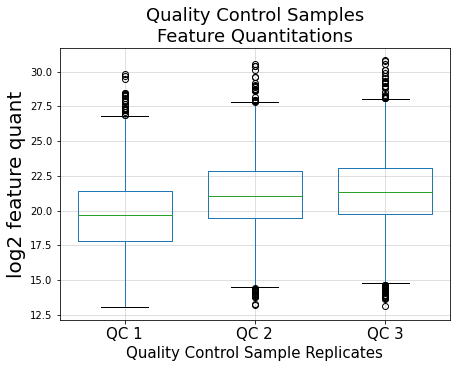

In [4]:
df = fr_raw

np.log2(df.filter(regex='QC')).boxplot(widths = 0.72)
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((7, 5))
ax.grid(True, alpha=0.5)
plt.xticks([1, 2, 3], labels=['QC 1', 'QC 2', 'QC 3'], fontsize=15)
plt.xlabel('Quality Control Sample Replicates', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('Quality Control Samples\nFeature Quantitations', fontsize=18)

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\QC samples feature quant.png')  

Text(0.5, 1.0, 'Quality Control Samples\nFeature Quantitations')

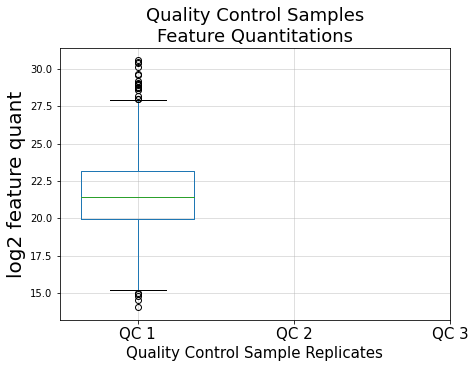

In [5]:
df = fr_filt

np.log2(df.filter(regex='QC')).boxplot(widths = 0.72)
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((7, 5))
ax.grid(True, alpha=0.5)
plt.xticks([1, 2, 3], labels=['QC 1', 'QC 2', 'QC 3'], fontsize=15)
plt.xlabel('Quality Control Sample Replicates', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('Quality Control Samples\nFeature Quantitations', fontsize=18)

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\QC samples feature quant.png')  

### 1b. Feature quant boxplots across samples 

60


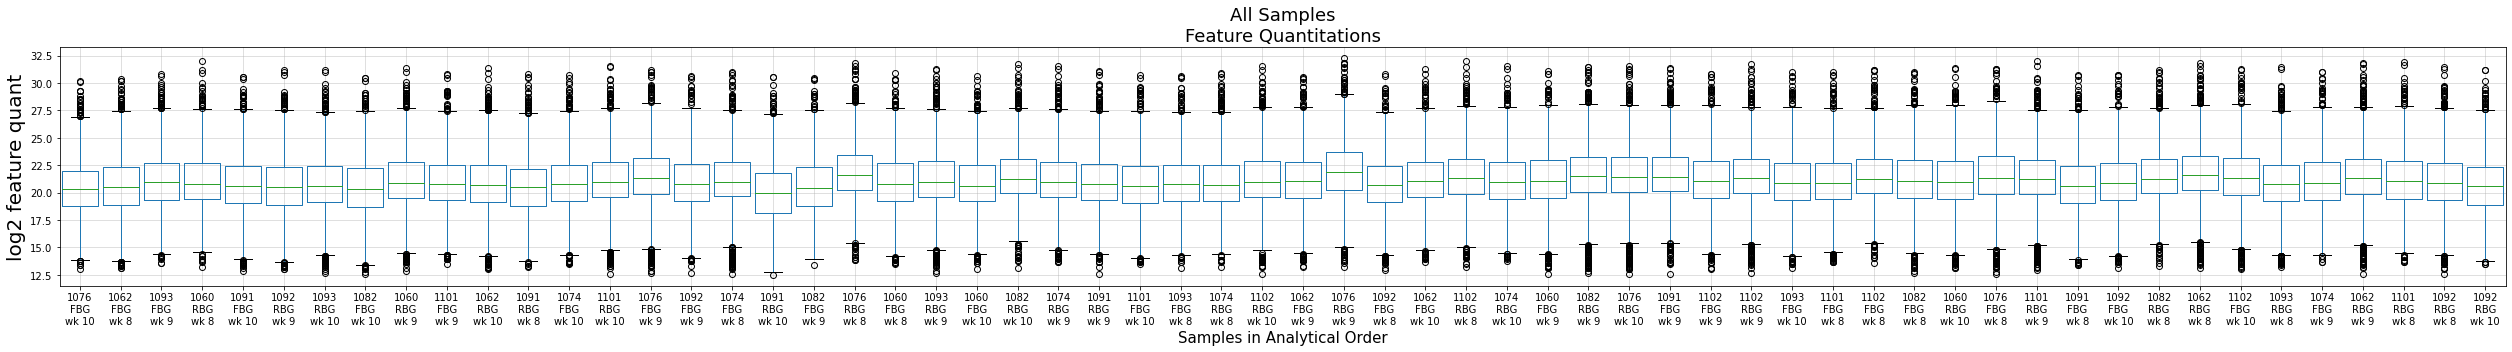

In [6]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((35, 5))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))
    
plt.xticks(range(1, 61), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 1.png')           


30


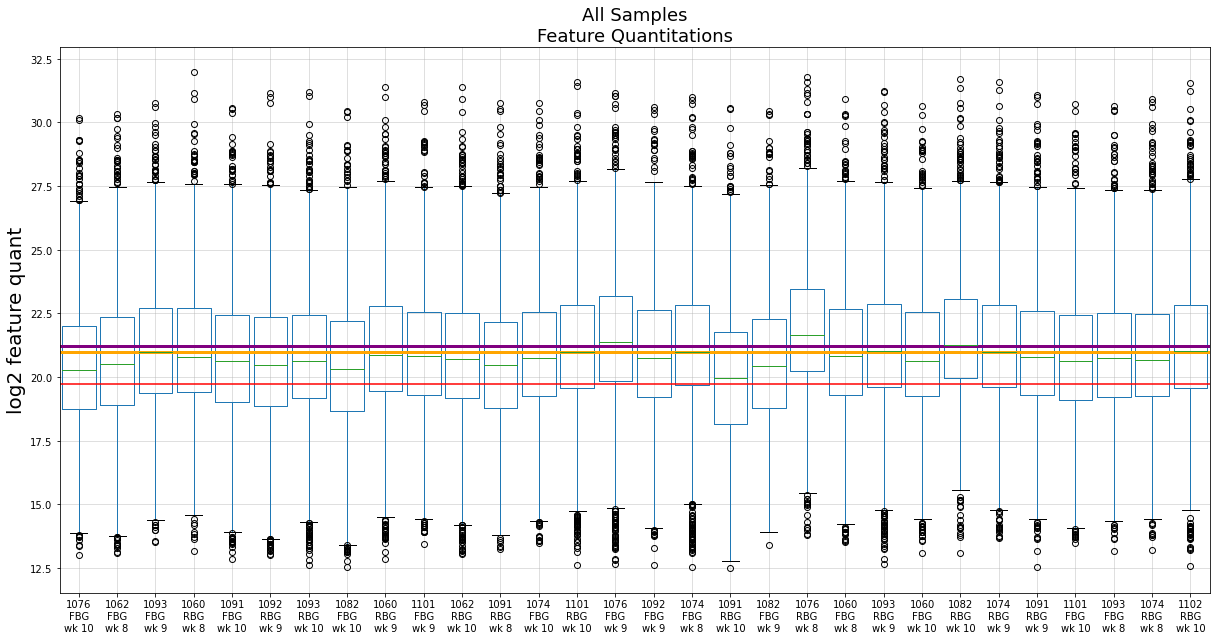

In [7]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order].iloc[:,0:30]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))
    
# Plot a line corresponding to the median of QC1 and median of all plots
qc1_median = np.log2(df.filter(regex='QC1')).median()
all_median = np.log2(df.filter(regex='.raw').mean(axis=1)).median()
qc2_qc3_median = np.log2(df.filter(regex='QC2|QC3').mean(axis=1)).median()
plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
# plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 1.png')           


30


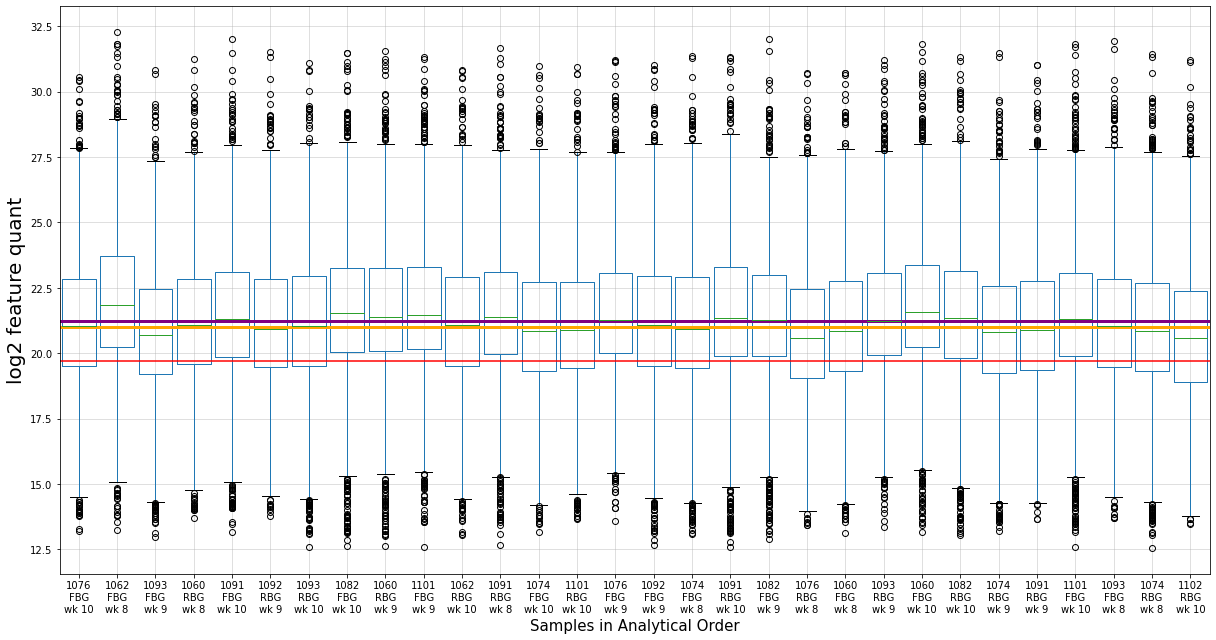

In [8]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order].iloc[:,30:]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))

plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
# plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 2.png')           


### 1c. Do a breakdown of 2 boxplots per animal, one F, one R. 
20 total boxplots, show groupings

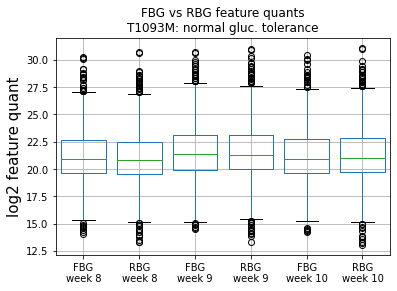

In [10]:
# f_vs_r_per_animal = pd.DataFrame()

# f_vs_r_per_animal_cols = []

# fig, ax = plt.subplot(111)

for animal in animals_used[1:2]:
    tmp_df = file_grouping[(file_grouping['rat_label'] == animal) & (file_grouping['quant_file'] == True)]
    rbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'RBG']['fr_name'].to_list() 
    fbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'FBG']['fr_name'].to_list() 
    
#     print(rbg_fr_filenames)
    
    fr_subset = fr_norm[rbg_fr_filenames + fbg_fr_filenames]
    fr_subset = fr_subset.sort_index(axis=1)
#     display(fr_subset)
    labels = []
    for fr_filename in fr_subset:
        row = file_grouping[file_grouping['fr_name'] == fr_filename]
#         display(row)
        animal_number = int(row['rat_label'].values[0])
#         print(animal_number)
        
        bg_type = str(row['bg_type'].values[0])
#         print(bg_type)
        
        week = str(int(row['week'].values[0]))
#         print(week)
#         print(row['week'])
        label = bg_type + '\nweek ' + week
        labels.append(label)
    
    np.log2(fr_subset).boxplot(widths=0.80)
    plt.ylabel('log2 feature quant', fontsize=15)
#     plt.xlabel('xlabel', fontsize=15)
    plt.xticks(list(range(1,7)), labels=labels)
    glucose_tolerance = animal_phenotypes[animal_phenotypes['animal'] == animal_number]['glucose_tolerance'].values[0]
    plt.title(f'FBG vs RBG feature quants\nT{animal}M: {glucose_tolerance} gluc. tolerance')
    
#     np.log2(fr[rbg_fr_filenames].mean(axis=1)).plot.box()  # Take average of all 3 weeks of RBG and plot
#     np.log2(fr[fbg_fr_filenames].mean(axis=1)).plot.box()
    
# plt.show()

### 3. Lipid class breakdown

TGs will be highly elevated in diabetic mice. Average each feature across the 2 normal glucose tolerance rats, per BG type

Do the same for diabetic vs impaired rats, then compare those 6 levels for TGs.

Should expect to see TGs elevated most in diabetic mice. 





Repeat this analysis for each unique lipid class with more than 10 IDs per class

In [24]:
for i in range(5):
    for j in range(3):
        for k in range(2):
            print(i, j)

0 0
0 0
0 1
0 1
0 2
0 2
1 0
1 0
1 1
1 1
1 2
1 2
2 0
2 0
2 1
2 1
2 2
2 2
3 0
3 0
3 1
3 1
3 2
3 2
4 0
4 0
4 1
4 1
4 2
4 2


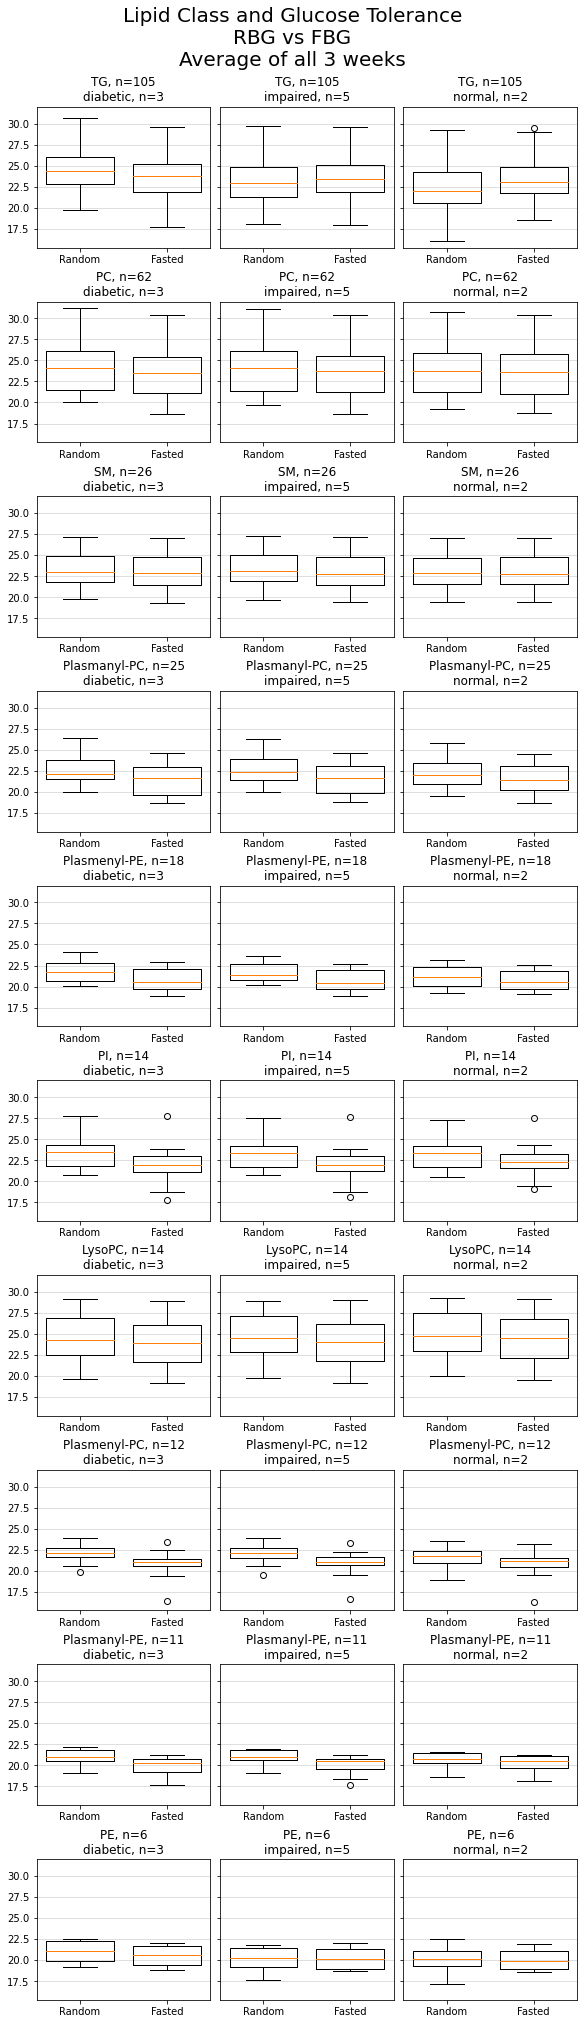

In [42]:
df = fr_filt

n_rats_per_gluc_tolerance = {'diabetic': 3, 'impaired': 5, 'normal': 2}

# 9 rows for each of 9 lipid classes that have # IDs > 10
# 3 cols for each glucose_tolerance 
fig, axs = plt.subplots(nrows=10, ncols=3, sharey=True, constrained_layout=True)
fig.set_size_inches((8, 28))
# plt.tight_layout()

lipid_classes = df['Lipid Class'].value_counts().iloc[1:11].to_dict()

for i, lipid_class in enumerate(lipid_classes):  # i = row index for axs
    for j, glucose_tolerance in enumerate(['diabetic', 'impaired', 'normal']):  # j = column index for axs
        
        # Get the fr_filenames from file_grouping['fr_name'] that match each iterator in each for loop
        # Then get the data from fr[fr_filenames]
        fr_filenames = file_grouping[(file_grouping['quant_file'] == True) &
                                     (file_grouping['glucose_tolerance'] == glucose_tolerance)]['fr_name']
        
        df = fr_filt[fr_filt['Lipid Class'] == lipid_class][fr_filenames]
        rbg = np.log2(df.filter(regex='RBG').mean(axis=1))
        fbg = np.log2(df.filter(regex='FBG').mean(axis=1))

        ax = axs[i][j]
        
        ax.boxplot([rbg, fbg], widths=0.78)
        ax.grid(alpha=0.5, axis='y')

        ax.set_title(f'{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{glucose_tolerance}, n={n_rats_per_gluc_tolerance[glucose_tolerance]}')
        ax.set_xticklabels(['Random', 'Fasted'])
        
fig.suptitle('Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of all 3 weeks', fontsize=20)
# plt.gcf()
# fig.supylabel('log2 feature quant', fontsize=20)  
    
# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\lipid class feature quant comparison.png')           


In [ ]:
# Unique lipid classes

unique_classes = fr['Lipid Class'].unique()[1:]
print(fr['Lipid Class'].value_counts().iloc[0:9])
print(unique_classes)

unique_classes = fr_filtered['Lipid Class'].unique()[1:]
print(unique_classes)
print(fr_filtered['Lipid Class'].value_counts().iloc[1:11])  # 1:11 drops the 800+ unknowns and keeps TG through PE
print(unique_classes)

tg_quants = fr[fr_quant_filenames_in_analytical_order][fr['Lipid Class'] == 'TG']

rbg_tg_quants = tg_quants.filter(regex='RBG')
fbg_tg_quants = tg_quants.filter(regex='FBG')

np.log2(rbg_tg_quants).boxplot()
fig = plt.gcf()
fig.set_size_inches((35, 5))
ax = plt.gca()
ax.grid(True, alpha=0.5)

labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fbg_tg_quants.columns.to_list()]


plt.xticks(ticks=list(range(1, fbg_tg_quants.shape[1] + 1)), 
           labels=labels);
plt.xlabel('sample')
plt.ylabel('log2 Feature Quant')
plt.title('FBG Triacylglycerol (TG) levels')

In [ ]:
np.log2(tg_quants.filter(regex='RBG')).boxplot()
# plt.xticks()

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches((8,5))

axs.boxplot([np.log2(fr[fr_quant_filenames_in_analytical_order].filter(regex='RBG').mean(axis=1)), 
             np.log2(fr[fr_quant_filenames_in_analytical_order].filter(regex='FBG').mean(axis=1))],
            )
axs.grid(alpha=0.5, axis='y')
plt.title('Average Feature quant\nRBG vs FBG', fontsize=20)
plt.xticks([1,2], ['RBG', 'FBG'], fontsize=12)
plt.ylabel('log2 feature quant', fontsize=15)
plt.tight_layout()
# plt.figsize((10, 8))

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\average feature quant rbg vs fbg.png')           


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=np.log2(fr['20210729_AJ_Toh_RatBloodGlucose_T1091M_20210327_8wk_FBG.raw (F35)'])))
fig.add_trace(go.Box(y=np.log2(fr['20210729_AJ_Toh_RatBloodGlucose_T1091M_20210327_8wk_FBG.raw (F35)'])))


fig.update_layout(width=500, height=800,
                  title='My title',
                  xaxis_title='X label',
                  yaxis_title='Y label',
#                   legend_title='Legend title',
                  font=dict(size=18))

# fig.title='hi'
fig.show()

In [ ]:
fig = go.Figure()


for animal in animals_used[:1]:
    tmp_df = file_grouping[(file_grouping['rat_label'] == animal) & (file_grouping['quant_file'] == True)]
    rbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'RBG']['fr_name'].to_list() 
    fbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'FBG']['fr_name'].to_list() 
    
#     print(rbg_fr_filenames)
    
    fr_subset = fr[rbg_fr_filenames + fbg_fr_filenames]
    fr_subset = fr_subset.sort_index(axis=1)
#     display(fr_subset)
    labels = []
    
#     fig = make_subplots(rows=1, cols=fr_subset.shape[1],
#                         shared_yaxes=True)
    
    for i, fr_filename in enumerate(fr_subset):
        row = file_grouping[file_grouping['fr_name'] == fr_filename]
#         display(row)
        animal_number = str(int(row['rat_label'].values[0]))
#         print(animal_number)
        
        bg_type = str(row['bg_type'].values[0])
#         print(bg_type)
        
        week = str(int(row['week'].values[0]))
#         print(week)
#         print(row['week'])
        label = animal_number + ' ' + bg_type + '' + week
        labels.append(label)
    
        fig.add_trace(go.Box(y=np.log2(fr_subset[fr_filename]), ), )
#                              row=1, col=i+1)


fig.update_layout(width=1000, height=800,
                  title='My title',
                  xaxis_title='X label',
                  yaxis_title='Y label',
#                   legend_title='Legend title',
                  font=dict(size=18))

fig.show()